In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import requests
from PIL import Image
from io import BytesIO

from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats
from nba_api.stats.static.teams import find_teams_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [2]:
import time, tqdm
from adjustText import adjust_text

In [3]:
plt.style.use('fivethirtyeight')

In [5]:
shots_df = ShotChartDetail(team_id=0, player_id=0, season_nullable='2021-22', context_measure_simple='FGA', timeout=300)

In [6]:
shots_df = shots_df.get_data_frames()[0]

In [7]:
shots_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100001,7,1628960,Grayson Allen,1610612749,Milwaukee Bucks,1,11,42,...,Left Side Center(LC),24+ ft.,26,-164,210,1,0,20211019,MIL,BKN
1,Shot Chart Detail,0022100001,15,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,11,13,...,Center(C),24+ ft.,26,0,263,1,0,20211019,MIL,BKN
2,Shot Chart Detail,0022100001,18,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,11,1,...,Center(C),8-16 ft.,14,5,147,1,0,20211019,MIL,BKN
3,Shot Chart Detail,0022100001,20,1629651,Nic Claxton,1610612751,Brooklyn Nets,1,10,47,...,Center(C),Less Than 8 ft.,0,1,4,1,1,20211019,MIL,BKN
4,Shot Chart Detail,0022100001,22,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,10,31,...,Center(C),8-16 ft.,10,15,104,1,0,20211019,MIL,BKN
5,Shot Chart Detail,0022100001,24,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,10,28,...,Center(C),Less Than 8 ft.,1,6,8,1,1,20211019,MIL,BKN
6,Shot Chart Detail,0022100001,25,201935,James Harden,1610612751,Brooklyn Nets,1,10,16,...,Left Side Center(LC),24+ ft.,27,-213,172,1,0,20211019,MIL,BKN
7,Shot Chart Detail,0022100001,27,201572,Brook Lopez,1610612749,Milwaukee Bucks,1,10,3,...,Center(C),24+ ft.,28,23,282,1,1,20211019,MIL,BKN
8,Shot Chart Detail,0022100001,29,201142,Kevin Durant,1610612751,Brooklyn Nets,1,9,42,...,Center(C),8-16 ft.,12,-21,125,1,1,20211019,MIL,BKN
9,Shot Chart Detail,0022100001,31,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,9,32,...,Center(C),Less Than 8 ft.,3,-6,36,1,0,20211019,MIL,BKN


In [8]:
three_df = shots_df.loc[shots_df.SHOT_TYPE == '3PT Field Goal']
three_df = three_df.loc[three_df.SHOT_DISTANCE <= 47]  # only half court shots


In [9]:
grouped_data = three_df.groupby('PLAYER_NAME').SHOT_DISTANCE.mean()

## Top shooters

In [10]:
league_stats = LeagueDashPlayerStats(season='2021-22')

league_df = league_stats.get_data_frames()[0]

top_shooters = league_df.sort_values(by='FG3M', ascending=False).iloc[:60]

distances = []
for i in range(len(top_shooters)):
    item = top_shooters.iloc[i]
    distances.append(grouped_data.loc[item.PLAYER_NAME])
top_shooters.loc[:, 'AVG_3PT_DIST'] = distances

top_shooters.loc[:, 'AVG_3PT_DIST_M'] = top_shooters.AVG_3PT_DIST * 0.3048

shooters = top_shooters.loc[top_shooters.PLAYER_NAME.isin(["Stephen Curry", "Damian Lillard", "Joe Harris", "Duncan Robinson", "Paul George", "Mikal Bridges"])]

shooters

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,AVG_3PT_DIST,AVG_3PT_DIST_M
513,201939,Stephen Curry,Stephen,1610612744,GSW,33.0,36,29,7,0.806,...,38,3,1,8,47,11,5,"201939,1610612744",26.641949,8.120466
165,1629130,Duncan Robinson,Duncan,1610612748,MIA,27.0,37,24,13,0.649,...,246,108,119,145,183,27,5,"1629130,1610612748",24.941176,7.602071
107,203081,Damian Lillard,Damian,1610612757,POR,31.0,29,12,17,0.414,...,20,29,412,50,39,27,5,"203081,1610612757",27.126761,8.268237


## Plotting

In [11]:

import random
from matplotlib.patches import Circle, Rectangle, Arc

# Amazing function by Bradley Fay for plotting the nba court
# source: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
def draw_court(ax=None, color='black', lw=2, background_color="#EBEBE8", outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, zorder=0)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed', zorder=0)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color, zorder=0)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 138, linewidth=lw,
                               color=color, zorder=0)
    corner_three_b = Rectangle((220, -47.5), 0, 138, linewidth=lw, color=color, zorder=0)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.13, theta2=157.87, linewidth=lw,
                    color=color, zorder=0)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-249, -48), 498, 470, linewidth=lw,
                            color=color, fill=None)
    court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [14]:
team_colors = {
    'IND': "#FDBB30",
    'HOU': "#CE1141",
    'SAC': "#5A2D81",
    'MIA': "#DB3EB1",
    'POR': "#CE1141",
    'CHA': "#00788C",
    'ATL': "#C1D32F",
    'WAS': "#002B5C",
    'UTA': "#F9A01B",
    'DAL': "#00538C",
    'CHI': "#CE1141",
    'MIN': "#78BE20",
    'LAL': "#552583",
    'DET': "#1D42BA",
    'BKN': "#000000",
    "TOR": "#B4975A",
    "NOP": "#0C2340",
    "GSW": "#FFC72C",
    "BKN": "black",
    "LAC": "#1D428A",
    "PHX": "#1D1160",
    "CLE": "#860038"
}

In [15]:
import math
import random
from matplotlib.patches import Circle, Rectangle, Arc


bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'

In [16]:
shooters = shooters.sort_values(by='AVG_3PT_DIST_M', ascending=False)

In [18]:
top_shooters = top_shooters.sort_values(by='AVG_3PT_DIST_M', ascending=False)

In [19]:
top_shooters

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,AVG_3PT_DIST,AVG_3PT_DIST_M
539,1629027,Trae Young,Trae,1610612737,ATL,23.0,35,15,20,0.429,...,8,2,112,6,9,27,5,"1629027,1610612737",27.746094,8.457009
107,203081,Damian Lillard,Damian,1610612757,POR,31.0,29,12,17,0.414,...,20,29,412,50,39,27,5,"203081,1610612757",27.126761,8.268237
117,1629636,Darius Garland,Darius,1610612739,CLE,21.0,34,20,14,0.588,...,131,32,8,45,34,27,5,"1629636,1610612739",26.697872,8.137511
513,201939,Stephen Curry,Stephen,1610612744,GSW,33.0,36,29,7,0.806,...,38,3,1,8,47,11,5,"201939,1610612744",26.641949,8.120466
361,1630163,LaMelo Ball,LaMelo,1610612766,CHA,20.0,34,18,16,0.529,...,62,36,182,15,24,7,5,"1630163,1610612766",26.209016,7.988508
176,201569,Eric Gordon,Eric,1610612745,HOU,33.0,35,11,24,0.314,...,112,81,544,134,183,27,5,"201569,1610612745",26.138122,7.966899
186,1627832,Fred VanVleet,Fred,1610612761,TOR,27.0,34,20,14,0.588,...,55,19,27,20,57,11,5,"1627832,1610612761",26.056782,7.942107
368,2544,LeBron James,LeBron,1610612747,LAL,37.0,29,16,13,0.552,...,19,10,164,12,28,5,5,"2544,1610612747",26.053097,7.940984
158,1628378,Donovan Mitchell,Donovan,1610612762,UTA,25.0,36,25,11,0.694,...,27,5,6,16,183,27,5,"1628378,1610612762",26.041176,7.937351
358,200768,Kyle Lowry,Kyle,1610612748,MIA,35.0,36,22,14,0.611,...,28,84,43,46,26,11,5,"200768,1610612748",25.755459,7.850264


Text(250, -60, 'instagram: @bballytics')

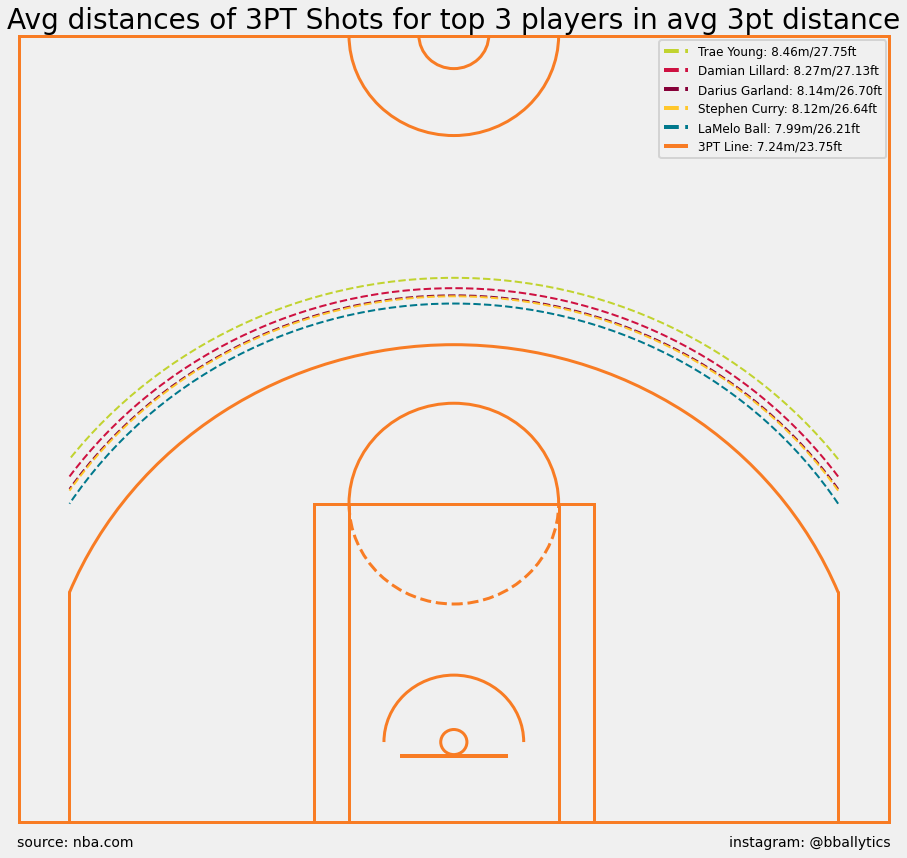

In [23]:
fig, ax = plt.subplots(figsize=(14, 14))

handles = []
labels = []
for index in range(5):
    item = top_shooters.iloc[index]
    radius = item.AVG_3PT_DIST * 10
    y = math.sqrt(pow(radius, 2) - pow(220, 2))
    angle = math.degrees(math.atan(y / 220.))
    three_arc = Arc((0, 0), radius * 2, radius * 2, theta1=angle, theta2=180 - angle,
                    linewidth=2, ls='--', color=team_colors[item.TEAM_ABBREVIATION])
    labels.append(f"{item.PLAYER_NAME}: {item.AVG_3PT_DIST_M:.2f}m/{item.AVG_3PT_DIST:.2f}ft")
    handles.append(plt.plot([],ls='--', color=team_colors[item.TEAM_ABBREVIATION])[0])
    ax.add_patch(three_arc)
    

labels.append(f"3PT Line: 7.24m/23.75ft")
handles.append(plt.plot([],ls='-', color=bball_orange)[0])
#three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
#                    color=color, zorder=0)
#ax = plt.gca()
#ax.add_patch(three_arc)
#arc_patch((0, 0), 26, 22, 158, ax=ax, fill=False, color='#FFFFFF', zorder=10)

#ax.set_facecolor(bball_gray)
#fig.set_facecolor(bball_gray)
ax.set_frame_on(False)


# Removing ticks
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
#ax.legend()
legend = ax.legend(handles, labels, fontsize=12)
frame = legend.get_frame()
frame.set_facecolor("#f0f0f0")
frame.set_linewidth(2)
#frame.set_edgecolor(bball_light_orange)
#for text in legend.get_texts():
#    text.set_color(bball_light_orange)
ax.grid(False)

# Title
ax.set_title("Avg distances of 3PT Shots for top 3 players in avg 3pt distance", size=28, color='black')

# Drawing court
draw_court(ax=ax,outer_lines=True, lw=3, color=bball_orange)
ax.set_xlim(-251,251)
ax.set_ylim(-65,423)
ax.text(x=-250, y=-60, va='center', ha='left', s='source: nba.com')
ax.text(x=250, y=-60, va='center', ha='right', s='instagram: @bballytics')




In [24]:
garland_id = find_players_by_full_name("Darius Garland")[0]['id']

In [25]:
garland_id

1629636

In [27]:
garland_shots = ShotChartDetail(team_id=0, player_id=garland_id, context_measure_simple='FGA', season_type_all_star='Regular Season')

In [28]:
garland_df = garland_shots.get_data_frames()[0]

In [31]:
seasons = ['2019-20', '2020-21', '2021-22']
dfs = []
distances = []
for season in seasons:
    garland_shots = ShotChartDetail(team_id=0, player_id=garland_id, context_measure_simple='FGA', season_type_all_star='Regular Season', season_nullable=season)
    garland_df = garland_shots.get_data_frames()[0]
    garland_df.loc[:, 'SEASON'] = season
    three_df = garland_df.loc[garland_df.SHOT_TYPE == '3PT Field Goal']
    three_df = three_df.loc[three_df.SHOT_DISTANCE <= 47]  # only half court shots
    distances.append(three_df.SHOT_DISTANCE.mean())
    dfs.append(garland_df)
    time.sleep(0.5)

In [32]:
distances

[25.70608108108108, 25.571428571428573, 26.697872340425533]

In [ ]:
top_shooters.AVG_3PT_DIST * 0.3048

In [38]:
colors = [
    "#000000",
    "#041E42",
    "#860038",
]

Text(250, -60, 'twitter: @daniel_bratulic')

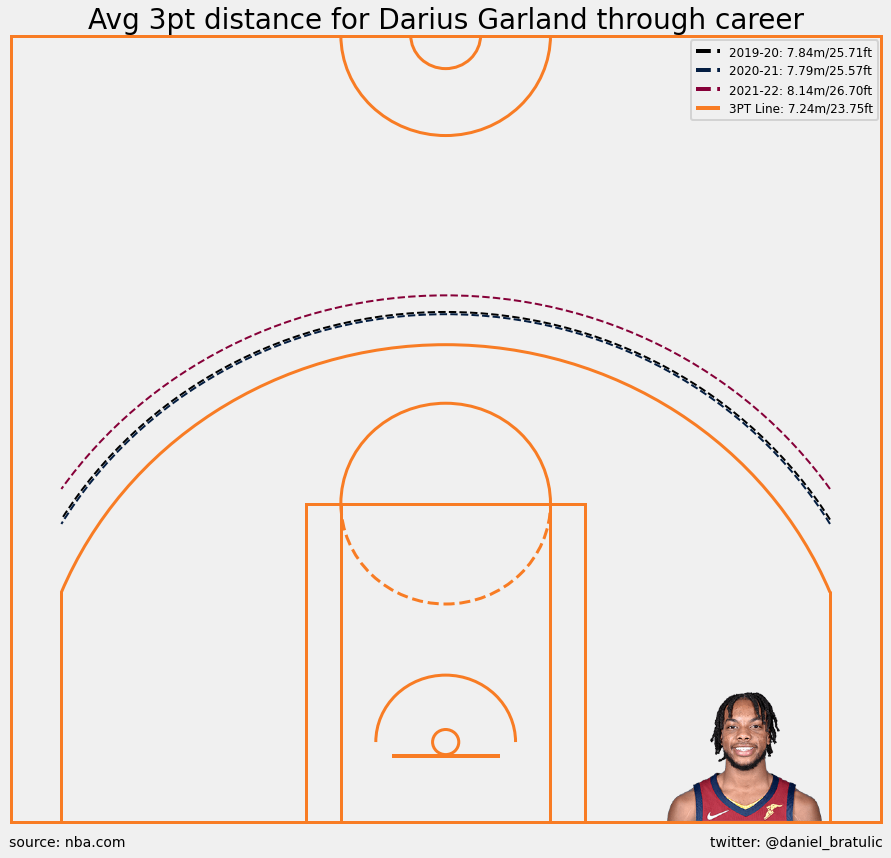

In [40]:
fig, ax = plt.subplots(figsize=(14, 14))

handles = []
labels = []
for index in range(len(seasons)):
    #item = top_shooters.iloc[index]
    radius = distances[index] * 10
    y = math.sqrt(pow(radius, 2) - pow(220, 2))
    distance_m = distances[index] * 0.3048
    angle = math.degrees(math.atan(y / 220.))
    three_arc = Arc((0, 0), radius * 2, radius * 2, theta1=angle, theta2=180 - angle,
                    linewidth=2, ls='--', color=colors[index])
    labels.append(f"{seasons[index]}: {distance_m:.2f}m/{distances[index]:.2f}ft")
    handles.append(plt.plot([],ls='--', color=colors[index])[0])
    ax.add_patch(three_arc)
    

labels.append(f"3PT Line: 7.24m/23.75ft")
handles.append(plt.plot([],ls='-', color=bball_orange)[0])
#three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
#                    color=color, zorder=0)
#ax = plt.gca()
#ax.add_patch(three_arc)
#arc_patch((0, 0), 26, 22, 158, ax=ax, fill=False, color='#FFFFFF', zorder=10)

#ax.set_facecolor(bball_gray)
#fig.set_facecolor(bball_gray)
ax.set_frame_on(False)


# Removing ticks
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
#ax.legend()
legend = ax.legend(handles, labels, fontsize=12)
frame = legend.get_frame()
frame.set_facecolor("#f0f0f0")
frame.set_linewidth(2)
#frame.set_edgecolor(bball_light_orange)
#for text in legend.get_texts():
#    text.set_color(bball_light_orange)
ax.grid(False)

ab = AnnotationBbox(OffsetImage(plt.imread(f'player_imgs/{garland_id}.png'), zoom=0.7), (172, -7.25), frameon=False)
#ab = AnnotationBbox(OffsetImage(img, zoom=1.0), (172, -7.5), frameon=False)
ax.add_artist(ab)

# Title
ax.set_title("Avg 3pt distance for Darius Garland through career", size=28, color='black')

# Drawing court
draw_court(ax=ax,outer_lines=True, lw=3, color=bball_orange)
ax.set_xlim(-251,251)
ax.set_ylim(-65,423)
ax.text(x=-250, y=-60, va='center', ha='left', s='source: nba.com')
ax.text(x=250, y=-60, va='center', ha='right', s='twitter: @daniel_bratulic')




In [41]:
shotchart_all = ShotChartDetail(player_id=0, team_id=0, context_measure_simple='FGA', season_nullable='2021-22').get_data_frames()[0]

shotchart_all.LOC_X = -shotchart_all.LOC_X

three_df = shotchart_all.loc[shotchart_all.SHOT_TYPE == '3PT Field Goal']
three_df = three_df.loc[three_df.SHOT_DISTANCE <= 47]  # only half court shots
three_df.loc[:, 'CALC_DISTANCE'] = ((three_df.LOC_X ** 2) + (three_df.LOC_Y ** 2)) ** (1/2) / 10

grouped_data = three_df.groupby(['PLAYER_NAME', 'PLAYER_ID']).agg({
    'SHOT_DISTANCE': 'mean',
    'CALC_DISTANCE': 'mean',
    'SHOT_ATTEMPTED_FLAG': 'sum'
}).reset_index()
grouped_data = grouped_data.sort_values(by='SHOT_ATTEMPTED_FLAG', ascending=False).iloc[:150]
grouped_data.loc[:, 'SEASON'] = '2021-22'
grouped_data.loc[:, 'CALC_DISTANCE_M'] = grouped_data.CALC_DISTANCE * 0.3048
three_df.loc[:, 'CALC_DISTANCE_M'] = three_df.CALC_DISTANCE * 0.3048


In [44]:
grouped_data.loc[:, 'SEASON'] = '2021-22'

In [48]:
sorted_data = grouped_data.sort_values(by='CALC_DISTANCE_M', ascending=False)
sorted_data = sorted_data.loc[sorted_data.SHOT_ATTEMPTED_FLAG > 200]

In [58]:
sorted_data = sorted_data.iloc[:15]

In [60]:
team_root_dir = f'../../team_logos/'
player_root_dir = f'player_imgs/'

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
zoom = 0.7

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

def get_team_img(team_id):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{team_id}.png'), zoom=zoom)

Text(0.2, -0.75, 'source: stats.nba.com')

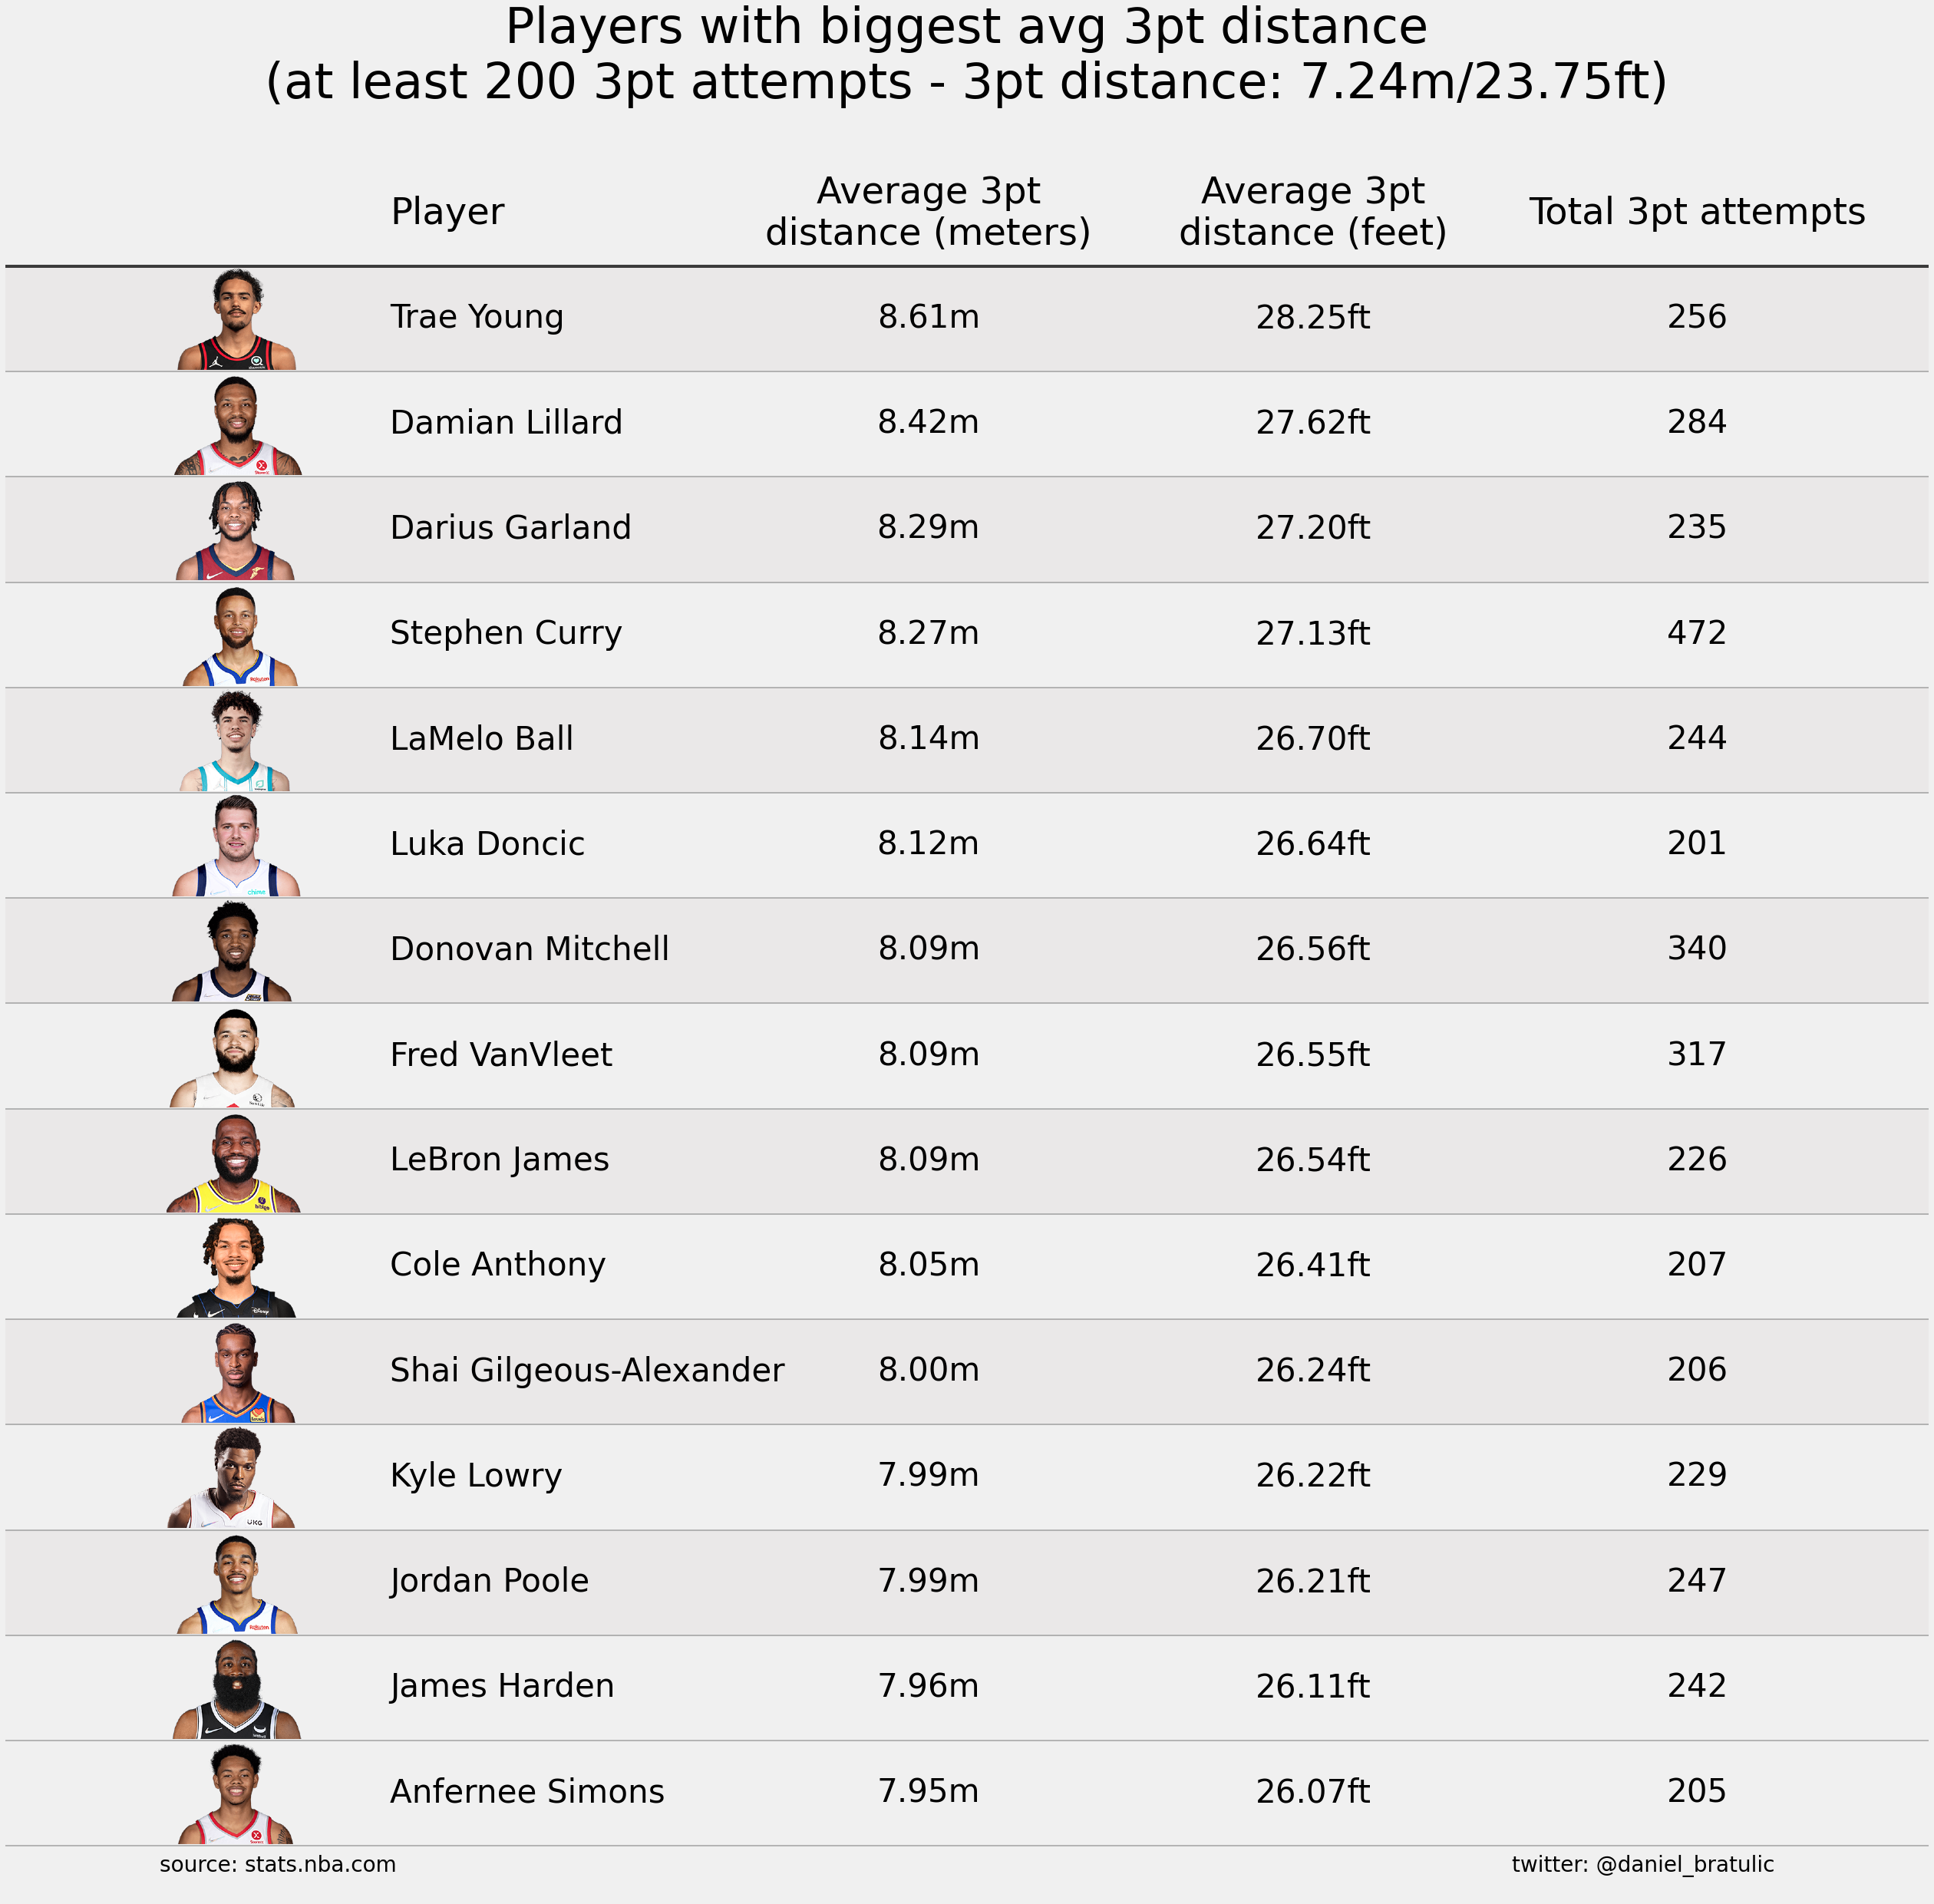

In [64]:
fig, ax = plt.subplots(figsize=(40, 40))
number_size = 42
font_size = 36
font_title = 48
title_size = 64
#top = 10

sorted_open_df = sorted_data
top = len(sorted_open_df)
for i in range(top):
    item = sorted_open_df.iloc[i]
    y_coord = top - i - 1
    if i % 2 == 1:
        color = '#EAE8E8'
        rect = Rectangle((-4.5, y_coord + 0.5), width=15, height=1, fill=True, color=color)
        ax.add_patch(rect)
        
    ab = AnnotationBbox(get_player_img(find_players_by_full_name(item.PLAYER_NAME)[0]['id']), (0.3, y_coord), frameon=False)
    ax.add_artist(ab)
    #ax.text(x=0.25, y=y_coord, ha='left', va='center', s=item.SEASON, size=number_size)
    ax.text(x=0.5, y=y_coord, ha='left', va='center', s=item.PLAYER_NAME, size=number_size)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=10, color='#A0A0A0', alpha=0.75, lw=2)
    
    ax.text(x=1.2, y=y_coord, ha='center', va='center', s=f"{item.CALC_DISTANCE_M:.2f}m", size=number_size)
    ax.text(x=1.7, y=y_coord, ha='center', va='center', s=f"{item.CALC_DISTANCE:.2f}ft", size=number_size)
    ax.text(x=2.2, y=y_coord, ha='center', va='center', s=f"{item.SHOT_ATTEMPTED_FLAG}", size=number_size)
    #ax.text(x=1.8, y=y_coord, ha='center', va='center', s=f"{item.AVERAGE_DISTANCE_M:.2f}m", size=number_size)
    #ax.text(x=2.2, y=y_coord, ha='center', va='center', s=f"{item.DIFF_FROM_AVG_M:.2f}m", size=number_size)
    
    
    #y_img_start = y_coord-0.5 + (1 - 0.730769232) / 2
    #ax.imshow(img, extent=(0, 1.36, y_img_start-0.5, y_img_start + 0.1), aspect='auto')
    #ax.imshow(img, extent=(0, 260, 0, 190), aspect=260/190)
    
#ax.text(x=0.25, y=top, s='Sezona', ha='left', va='center', size=font_title)
ax.text(x=0.5, y=top, s='Player', ha='left', va='center', size=font_title)
ax.text(x=1.2, y=top, ha='center', va='center', s="Average 3pt\ndistance (meters)", size=font_title)
ax.text(x=1.7, y=top, ha='center', va='center', s="Average 3pt\ndistance (feet)", size=font_title)
ax.text(x=2.2, y=top, ha='center', va='center', s="Total 3pt attempts", size=font_title)
#ax.text(x=2.7, y=top, ha='center', va='center', s="% of shots in RA", size=font_title)

#ax.text(x=2.75, y=-0.75, s='twitter: @daniel_bratulic', ha='right', va='center', size=30)
#ax.text(x=0.25, y=-0.75, s='data: nba.com', ha='left', va='center', size=30)
ax.axhline(y=top-0.5, xmin=-0.25, xmax=10, color='black', alpha=0.75, lw=4)
ax.set_title("Players with biggest avg 3pt distance\n(at least 200 3pt attempts - 3pt distance: 7.24m/23.75ft)", size=title_size)
    
ax.set_ylim(bottom=-1, top=top+1)
ax.set_xlim(left=-0, right=2.5)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig('table_wo_luck.png', dpi=120, bbox_inches='tight')
ax.text(x=2.3, y=-0.75, ha='right', s='twitter: @daniel_bratulic', size=28)
ax.text(x=0.2, y=-0.75, ha='left', s='source: stats.nba.com', size=28)